# Perceptron

Based on **Patric Loeber** video: https://www.youtube.com/watch?v=t2ym2a3pb_Y&t

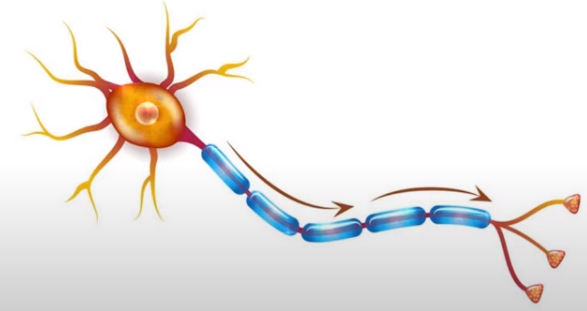

### Notes

The perceptron can be seen as one single unit of an artificial neural network, so the perceptron is a simplified model of a biological neuron and it simulates the behavior of only one cell. Let's have a look at this image above, here we have one cell and our cell gets an imput so it gets input signals and they are weighted and summed up. If the whole input signal reaches a certain threhold our cell fires a signal and delivers an output. In our case it either fires a 1 or 0.

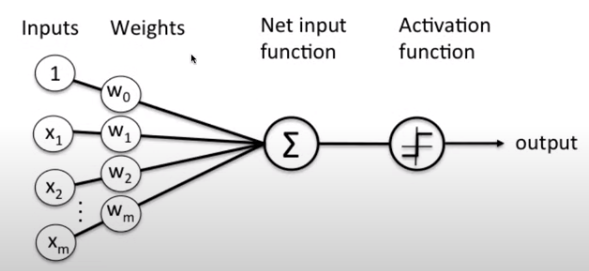

### Notes

If we model the perceptron mathematically then it looks linke in imgage above. We have our input features and they are multiplied with some weights and then summed up. After summing up we applay an activation function and get output class. So this is basicaly the model.

## Linear Model

$ f(w,b) = w^{T}x + b $

### Notes

The linear model simply looks like this, so this is just a linear function. Weights transposed times x plus bias. Here we multiply and sum up our weights and the bias. The bias is w0 in the mathematical model picture above.

## Activation Function

### Unit step function

$ g(z) = \begin{cases}
  1, & \text{if } z \ge 0, \\
  0, & \text{otherwise}.
\end{cases} $

### Notes

After linear model we apply the activation function and in the simplest case we simply use the so-called unit step function. Unit step function is defined as it's either 1 if our input reaches a certain threshold or 0 otherwise.

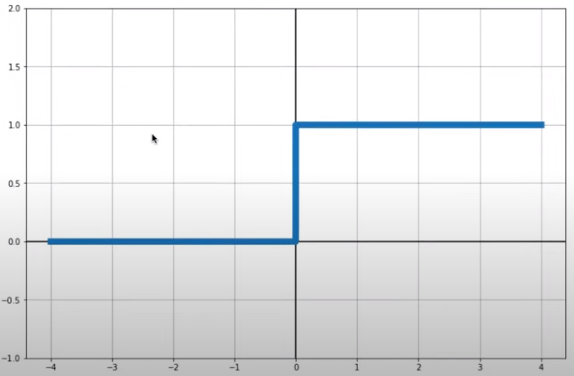

### Notes

In this picture the threshold is 0, so if input is larger than 0 then the output is 1 and otherwise it's 0.

## Approximation

$ \hat{y} = g(f(w,b)) = g(w^{T}x + b) $

### Notes

First we apply the linear function and then we apply the activation function and now we have to come up with the weights and the bias.

## Perceptron update rule

For each training sample $x_{i}$:

$ w := w + \Delta w $

$ \Delta w := \alpha \cdot (y_{i} - \hat{y}_{i}) \cdot x_{i} $

$ \alpha : \text{learning rate in} \,  [0,1] $

### Notes

To find the weights and the bias we use a simple update rule that is called the perceptron rule. We look at each training sample $x_{i}$ and for each training sample we apply the update step. Update step is defined as the new weight is the old weight plus the delta weight. The delta weight is defined as alpha times the actual label minus the predicted label times the training sample X. Alpha is a learning rate between 0 and 1, so this is just a scaling factor. Next step is to understand what update rule means. To understand update rule we will have a look at the four possible cases in two class problem.

## Update rule explanation

$  y \quad \hat{y} \quad y - \hat{y} \\ 1 \quad 1 \qquad 0 \\ 1 \quad 0 \qquad 1 \\ 0 \quad 0 \qquad 0 \\ 0 \quad 1 \quad -1 \\ $

$ \xrightarrow{} \text{Weights are pushed towards positive or negative target class in case of missclassification}$

### Notes

The actual label can be one and the predicted label is also one then the difference is zero so we have no change for our weights. Same situation is if the actual class is zero and the predicted class is also zero, so correctly classified and the difference is zero. Again no change for our weights. But now what happens if we have a miss classification. If the actual class is one and the predicted class is zero, this means that our weights are too low and then we see that the difference is one so our weights are increased here and if the actual class is zero and the predicted clas is 1 then our weights are too high and we see that the difference is minus one so then our weights are decreased so the weights are pushed towards the positive or negative class in case of a miss classification.

This is a simple and intuitive rule but it works and this is all we need. We look at each training sample and then apply the update rule, and then we do this couple of times. We iterate for a certain number of iterations and then we have the final weights.

In [1]:
import numpy as np

class Perceptron:
    
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        # init weights and bias
        self.weights, self.bias = np.zeros(n_features), 0
        
        # we ant to be sure that our y only consists of classe 0 & 1
        y_ = np.array([1 if i > 0 else 0 for i in y])
        
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                update = self.learning_rate * (y_[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
        
        
    def predict(self, X):
        # weights transposed timex X is the dot product
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)
        
    

Perceptron classification accuracy 1.0


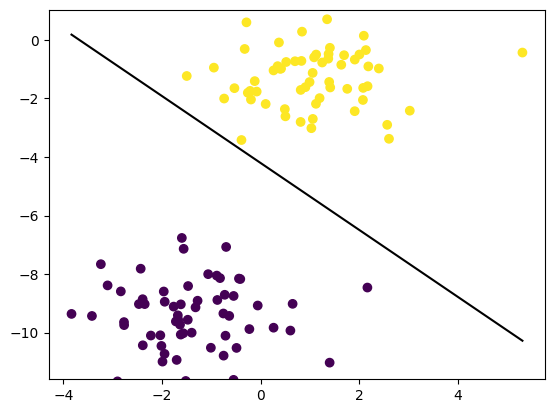

In [3]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

X, y = datasets.make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

p = Perceptron(learning_rate=0.01, n_iters=1000)
p.fit(X_train, y_train)
predictions = p.predict(X_test)

print("Perceptron classification accuracy", accuracy(y_test, predictions))

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(X_train[:,0], X_train[:,1], marker='o', c=y_train)

x0_1 = np.amin(X_train[:,0])
x0_2 = np.amax(X_train[:,0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X_train[:1])
ymax = np.amax(X_train[:1])
ax.set_ylim([ymin-3,ymax+3])

plt.show()

### Notes

The perceptron only works for linearly separable classes so if classes can be separated with a linear function like in our case then it works very well but otherwise not so much and for further improvements we can try out different activation functions for example sigmoid function and then apply a gradient descent method rather than the perceptron rule in order to update our weights.